Found file for KATE 5-shot: Triage-KTAS_KATECoT_gpt-4o_json_5_shots_natural_0_1000_2025-02-26_20:29:26_metrics.json
Found file for KATE 10-shot: Triage-KTAS_KATE_gpt-4o_json_10_shots_natural_0_1000_2025-02-26_18:32:13_metrics.json
Found file for KATE 20-shot: Triage-KTAS_KATE_gpt-4o_json_20_shots_natural_0_1000_2025-02-26_18:41:09_metrics.json
Found file for KATE 30-shot: Triage-KTAS_KATE_gpt-4o_json_30_shots_natural_0_1000_2025-02-26_18:49:54_metrics.json
Found file for KATE 40-shot: Triage-KTAS_KATE_gpt-4o_json_40_shots_natural_0_1000_2025-02-26_00:41:11_metrics.json
Found file for KATECoT 5-shot: Triage-KTAS_KATECoT_gpt-4o_json_5_shots_natural_0_1000_2025-02-26_20:29:26_metrics.json
Found file for KATECoT 10-shot: Triage-KTAS_KATECoT_gpt-4o_json_10_shots_natural_0_1000_2025-02-26_21:42:21_metrics.json
Found file for KATECoT 20-shot: Triage-KTAS_KATECoT_gpt-4o_json_20_shots_natural_0_1000_2025-02-27_04:37:37_metrics.json
Found file for KATECoT 30-shot: Triage-KTAS_KATECoT_gpt-4o_json

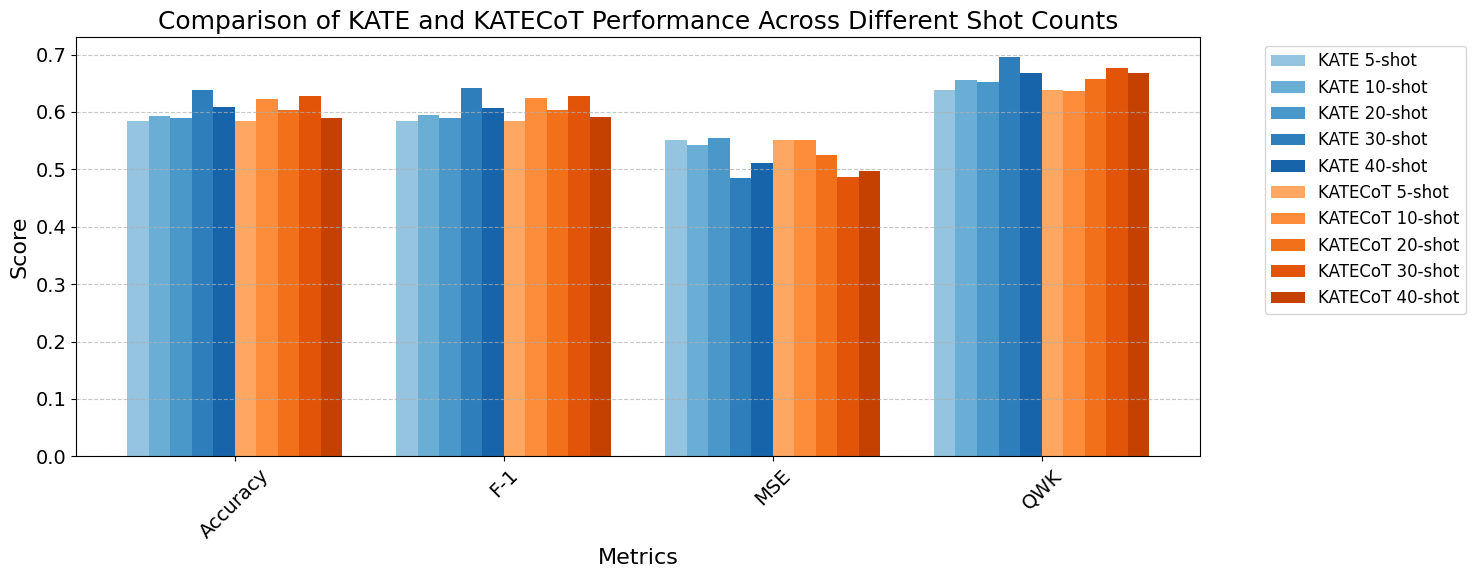

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

def load_metrics(filename):
    with open(filename, 'r') as f:
        return json.load(f)

# Find all relevant files
base_path = "./"
shot_counts = [5, 10, 20, 30, 40]
models = ["KATE", "KATECoT"]

# Dictionary to store our files
files = {}

for model in models:
    for shots in shot_counts:
        # Create pattern to match files
        pattern = f"{base_path}*{model}*{shots}_shots*_0_1000*.json"
        matching_files = glob.glob(pattern)
        if matching_files:
            key = f"{model} {shots}-shot"
            files[key] = matching_files[0]
            print(f"Found file for {key}: {os.path.basename(matching_files[0])}")
        else:
            print(f"Warning: No file found for {model} with {shots} shots")

# Metrics to plot
metrics = ['accuracy', 'f1_score', 'mse', 'quadratic_kappa']
metric_labels = ['Accuracy', 'F-1', 'MSE', 'QWK']
results = {}

# Load all results
for name, file in files.items():
    try:
        data = load_metrics(file)
        results[name] = {metric: data['overall'][metric] for metric in metrics}
    except FileNotFoundError:
        print(f"Warning: Could not find file for {name}")

# Create the plot
plt.figure(figsize=(15, 6))  # Reduced height from 8 to 6

# Set font sizes
plt.rcParams.update({'font.size': 14})

# Set width of bars and positions of the bars
num_models = len(files)
bar_width = 0.8 / num_models
r = np.arange(len(metrics))

# Create color schemes for KATE and KATECoT
kate_colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(shot_counts)))
katecot_colors = plt.cm.Oranges(np.linspace(0.4, 0.8, len(shot_counts)))
color_dict = {}

for i, shots in enumerate(shot_counts):
    color_dict[f"KATE {shots}-shot"] = kate_colors[i]
    color_dict[f"KATECoT {shots}-shot"] = katecot_colors[i]

# Plot bars for each model
for i, (name, data) in enumerate(results.items()):
    values = [data[metric] for metric in metrics]
    plt.bar(r + i * bar_width, values, bar_width, label=name, color=color_dict.get(name))

# Customize the plot
plt.xlabel('Metrics', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title('Comparison of KATE and KATECoT Performance Across Different Shot Counts', fontsize=18)
plt.xticks(r + bar_width * (num_models-1)/2, metric_labels, rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
# plt.savefig('kate_katecot_comparison.png', bbox_inches='tight', dpi=300)
plt.show()